In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error, r2_score,mean_absolute_percentage_error



In [12]:
data = pd.read_csv("car.csv")
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [13]:
data.shape

(301, 9)

In [14]:
# Check for missing value
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
# check the statistics of data
print(data.describe())

              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    2003.000000       0.320000     500.000000    0.000000       0.100000
25%    2012.000000       1.200000   15000.000000    0.000000       0.900000
50%    2014.000000       6.400000   32000.000000    0.000000       3.600000
75%    2016.000000       9.900000   48767.000000    0.000000       6.000000
max    2018.000000      92.600000  500000.000000    3.000000      35.000000


In [18]:
# lets see the Correlation between the features
print(data.corr())

                   Year  Present_Price  Kms_Driven     Owner  Selling_Price
Year           1.000000      -0.047584   -0.524342 -0.182104       0.236141
Present_Price -0.047584       1.000000    0.203647  0.008057       0.878983
Kms_Driven    -0.524342       0.203647    1.000000  0.089216       0.029187
Owner         -0.182104       0.008057    0.089216  1.000000      -0.088344
Selling_Price  0.236141       0.878983    0.029187 -0.088344       1.000000


/tmp/ipykernel_22362/1085274482.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


/tmp/ipykernel_22362/464908924.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


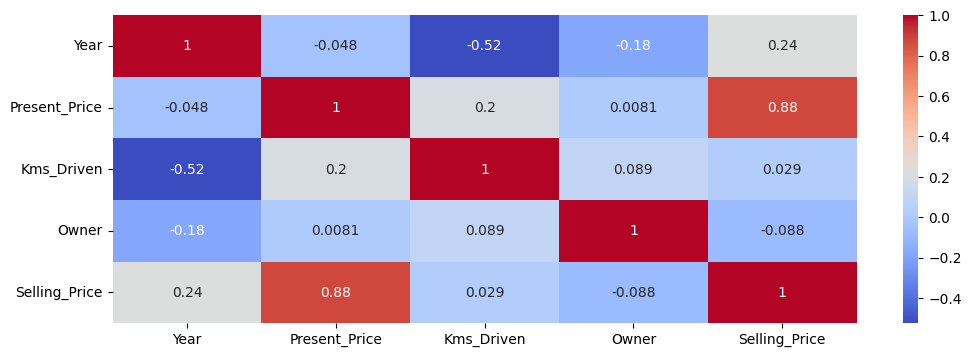

In [19]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [29]:


# Lets encode the text features using Label Encoding
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()



,Year,Kms_Driven,Present_Price,Fuel_Type,Transmission,Owner,Selling_Price
0,2014,27000,5.59,2,1,0,3.35
1,2013,43000,9.54,1,1,0,4.75
2,2017,6900,9.85,2,1,0,7.25
3,2011,5200,4.15,2,1,0,2.85
4,2014,42450,6.87,1,1,0,4.60


In [30]:
#Petrol=2, Diesel=1, CNG=0
data.Fuel_Type.unique()

array([2, 1, 0])

In [31]:
#Manual=1, Automatic=0
data.Transmission.unique()

array([1, 0])

In [32]:
#First=0, Second=1, Fourth=3
data.Owner.unique()


array([0, 1, 3])

In [33]:
# Target column is Selling Price
predict = "Selling_Price"
data = data[["Year", "Kms_Driven", 
             "Present_Price", "Fuel_Type", "Transmission", 
             "Owner", "Selling_Price"]]


In [34]:
# Split dataset into input (other than selling price) and output (Selling Price)
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

/tmp/ipykernel_22362/757806913.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [35]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
# Train all 7 models on x_train and y_train
lrmodel=LinearRegression().fit(x_train,y_train)
dt_model = DecisionTreeRegressor().fit(x_train,y_train)
rf_model=RandomForestRegressor().fit(x_train,y_train)
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)
lgbm_model=LGBMRegressor().fit(x_train,y_train)
xgb_model= XGBRegressor().fit(x_train,y_train)
catb_model= CatBoostRegressor().fit(x_train,y_train)


Learning rate set to 0.032678
0:	learn: 4.8030564	total: 47.1ms	remaining: 47s
1:	learn: 4.7338633	total: 47.5ms	remaining: 23.7s
2:	learn: 4.6569202	total: 47.9ms	remaining: 15.9s
3:	learn: 4.5890403	total: 48.2ms	remaining: 12s
4:	learn: 4.5181955	total: 48.6ms	remaining: 9.68s
5:	learn: 4.4492564	total: 49ms	remaining: 8.11s
6:	learn: 4.3847904	total: 49.4ms	remaining: 7s
7:	learn: 4.3099239	total: 49.7ms	remaining: 6.17s
8:	learn: 4.2353981	total: 50ms	remaining: 5.51s
9:	learn: 4.1569784	total: 50.4ms	remaining: 4.99s
10:	learn: 4.0912584	total: 50.7ms	remaining: 4.56s
11:	learn: 4.0326610	total: 51.2ms	remaining: 4.21s
12:	learn: 3.9729467	total: 51.5ms	remaining: 3.91s
13:	learn: 3.9045046	total: 51.9ms	remaining: 3.65s
14:	learn: 3.8462802	total: 52.2ms	remaining: 3.43s
15:	learn: 3.7901086	total: 52.5ms	remaining: 3.23s
16:	learn: 3.7321017	total: 52.9ms	remaining: 3.06s
17:	learn: 3.6791062	total: 53.4ms	remaining: 2.92s
18:	learn: 3.6119116	total: 53.8ms	remaining: 2.78s
19:

242:	learn: 0.6413853	total: 142ms	remaining: 443ms
243:	learn: 0.6364323	total: 143ms	remaining: 442ms
244:	learn: 0.6346482	total: 143ms	remaining: 441ms
245:	learn: 0.6331076	total: 144ms	remaining: 442ms
246:	learn: 0.6288087	total: 145ms	remaining: 441ms
247:	learn: 0.6232186	total: 145ms	remaining: 440ms
248:	learn: 0.6195617	total: 146ms	remaining: 439ms
249:	learn: 0.6184587	total: 146ms	remaining: 438ms
250:	learn: 0.6164386	total: 146ms	remaining: 437ms
251:	learn: 0.6119106	total: 147ms	remaining: 436ms
252:	learn: 0.6104601	total: 147ms	remaining: 435ms
253:	learn: 0.6095177	total: 148ms	remaining: 433ms
254:	learn: 0.6083391	total: 148ms	remaining: 432ms
255:	learn: 0.6067754	total: 148ms	remaining: 431ms
256:	learn: 0.6016104	total: 149ms	remaining: 430ms
257:	learn: 0.6001753	total: 149ms	remaining: 429ms
258:	learn: 0.5986701	total: 150ms	remaining: 428ms
259:	learn: 0.5978119	total: 150ms	remaining: 428ms
260:	learn: 0.5933525	total: 151ms	remaining: 427ms
261:	learn: 

615:	learn: 0.2884251	total: 267ms	remaining: 166ms
616:	learn: 0.2881786	total: 267ms	remaining: 166ms
617:	learn: 0.2880506	total: 267ms	remaining: 165ms
618:	learn: 0.2877019	total: 268ms	remaining: 165ms
619:	learn: 0.2869414	total: 268ms	remaining: 164ms
620:	learn: 0.2863089	total: 269ms	remaining: 164ms
621:	learn: 0.2858707	total: 269ms	remaining: 163ms
622:	learn: 0.2852752	total: 269ms	remaining: 163ms
623:	learn: 0.2848546	total: 270ms	remaining: 162ms
624:	learn: 0.2847046	total: 270ms	remaining: 162ms
625:	learn: 0.2841468	total: 270ms	remaining: 161ms
626:	learn: 0.2835520	total: 271ms	remaining: 161ms
627:	learn: 0.2832050	total: 271ms	remaining: 160ms
628:	learn: 0.2825854	total: 271ms	remaining: 160ms
629:	learn: 0.2819845	total: 271ms	remaining: 159ms
630:	learn: 0.2817319	total: 272ms	remaining: 159ms
631:	learn: 0.2810874	total: 272ms	remaining: 158ms
632:	learn: 0.2807067	total: 272ms	remaining: 158ms
633:	learn: 0.2800971	total: 273ms	remaining: 157ms
634:	learn: 

937:	learn: 0.1920848	total: 380ms	remaining: 25.1ms
938:	learn: 0.1919888	total: 380ms	remaining: 24.7ms
939:	learn: 0.1918389	total: 380ms	remaining: 24.3ms
940:	learn: 0.1916485	total: 381ms	remaining: 23.9ms
941:	learn: 0.1912181	total: 381ms	remaining: 23.5ms
942:	learn: 0.1910545	total: 382ms	remaining: 23.1ms
943:	learn: 0.1907257	total: 382ms	remaining: 22.7ms
944:	learn: 0.1904673	total: 382ms	remaining: 22.2ms
945:	learn: 0.1901590	total: 383ms	remaining: 21.8ms
946:	learn: 0.1899837	total: 383ms	remaining: 21.4ms
947:	learn: 0.1899710	total: 383ms	remaining: 21ms
948:	learn: 0.1899186	total: 384ms	remaining: 20.6ms
949:	learn: 0.1896849	total: 384ms	remaining: 20.2ms
950:	learn: 0.1895339	total: 384ms	remaining: 19.8ms
951:	learn: 0.1892598	total: 385ms	remaining: 19.4ms
952:	learn: 0.1889993	total: 386ms	remaining: 19ms
953:	learn: 0.1889870	total: 386ms	remaining: 18.6ms
954:	learn: 0.1889710	total: 387ms	remaining: 18.2ms
955:	learn: 0.1888036	total: 387ms	remaining: 17.8

In [37]:


# define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
    print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))



In [38]:


# Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test))
print()
print("LGBM_Model:")
print(evaluate_model(lgbm_model,x_test,y_test))
print()
print("XGB_Model:")
print(evaluate_model(xgb_model,x_test,y_test))
print()
print("CatBoost_Model:")
print(evaluate_model(catb_model,x_test,y_test))



LR_Model:
Mean Absolute Error: 1.3429608761711194
Mean Absolute Percentage Error: 1.1676330271267263
Mean Squared Error: 3.0314066817086562
Root Mean Squared Error: 1.7410935304309922
R2 Score: 0.9085246614614071
None

DT_Model:
Mean Absolute Error: 0.7875409836065573
Mean Absolute Percentage Error: 0.21692180295194882
Mean Squared Error: 2.0357016393442624
Root Mean Squared Error: 1.4267801650374392
R2 Score: 0.9385709288871714
None

RF_Model:
Mean Absolute Error: 0.6928508196721309
Mean Absolute Percentage Error: 0.1670149840939653
Mean Squared Error: 1.3172661316393444
Root Mean Squared Error: 1.147722149145578
R2 Score: 0.9602503464598774
None

GBM_Model:
Mean Absolute Error: 0.6866415393113546
Mean Absolute Percentage Error: 0.15528293556809855
Mean Squared Error: 1.3479734974368145
Root Mean Squared Error: 1.1610226084951207
R2 Score: 0.9593237249349923
None

LGBM_Model:
Mean Absolute Error: 1.06326763066895
Mean Absolute Percentage Error: 0.31419068121991633
Mean Squared Error: 

In [39]:
# From above result, as r2 is comparitely high in CatBoost Model,
# so we will finalize this model, also now Lets do the prediction for x_test data
predictions = catb_model.predict(x_test)
predictions

array([ 4.27963425,  4.40062937,  0.88163375,  2.72190254,  5.91702905,
        3.02886949,  0.49779864,  9.04934648,  5.7509042 ,  6.16055474,
        0.85183241,  2.38456205,  0.47839097,  0.67965904,  1.06122908,
        0.64833543,  7.97699328, 21.14342613,  1.23940528,  0.57554563,
       15.09517331,  2.85954635,  4.49026866, 15.14364764,  0.5180227 ,
        0.4442485 ,  6.02635342,  1.5918539 ,  4.14859419,  0.8477686 ,
        5.92450939, 20.86053911,  0.57956791, 13.10243502,  5.386093  ,
        0.56659194,  6.37804568, 21.45072316,  0.28283517,  8.66878302,
        0.64702502,  0.3527171 ,  5.83221624,  0.83196192,  3.11289306,
        9.62461366,  5.37545457,  2.78955011,  0.46473044,  4.97776717,
       11.24244943,  0.79325654,  6.35188042,  0.16529665,  4.1854356 ,
        0.59173852,  0.56436152, 11.32338885,  5.14511393,  6.27813474,
       21.14342613])

In [41]:
#  Let's do the prediction new unknown data
input=[[2016,30000,6.87,1,1,0,0]]
price = catb_model.predict(input)
print(price.round(1)[0],"in Lakhs")

5.8 in Lakhs


In [42]:


# Save the model in pickle file
import pickle
pickle.dump(catb_model,open("car_price_predictor_model.pkl","wb"))

